In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Gráficos
# ------------------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

# Transformación de los datos
# ------------------------------------------------------------------------------
from scipy import stats
import math 
from sklearn.preprocessing import MinMaxScaler

# Para la gestión de los warning
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Para poder ver todas las columnas del dataframe
# ------------------------------------------------------------------------------
pd.options.display.max_columns = None 

In [2]:
df= pd.read_csv('data/insurance.csv', index_col=0)

Sobre la variable respuesta, en pair programmings anterior identificastéis si seguía una distribución normal o no. En caso de que no siguiera una distribución normal, normalizarla. Podéis usar el método que prefiráis o el que mejor se ajuste
Guardar en un csv el nuevo dataframe que habéis creado para seguir usándolo en los siguientes pair programmings



In [3]:
df.head(2)

,sex,bmi,children,smoker,region,charges
age,,,,,,
19,female,27.90,0,yes,southwest,16884.9240
18,male,33.77,1,no,southeast,1725.5523


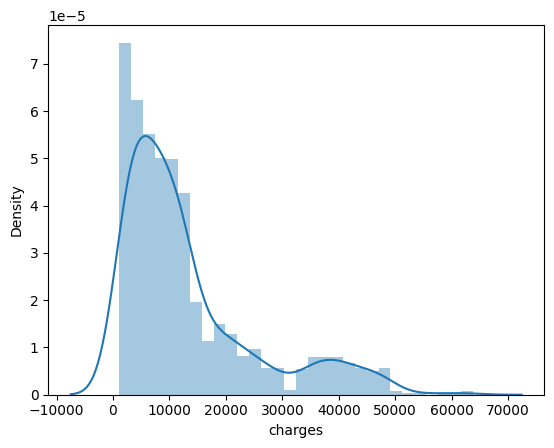

In [4]:
#comprobamos la distribucioon de nuestros datos
sns.distplot(df["charges"]);

In [5]:
#comprobamos tambien con el metodo spahiro sobre la variable predictora
stats.shapiro(df["charges"])

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

El p-valor es mayor a 0.05 por lo que no podemos rechazar nuestra 
H0, no podemos rechazar la hipótesis nula.
Comno no tiene una distribución normal, vamos a aplicar el metodo box-cox porque es el más usado.

In [6]:
df['charges_box'], lambda_ajustada = stats.boxcox(df['charges'])

In [7]:
lambda_ajustada

0.043649053770664956

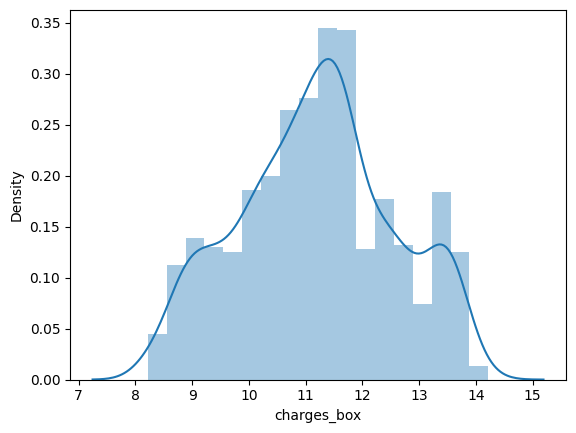

In [9]:
sns.distplot(df["charges_box"]);

In [10]:
stats.shapiro(df["charges_box"])

ShapiroResult(statistic=0.983511209487915, pvalue=3.2491578871862714e-11)

In [11]:
df.to_csv('data/df_normalizado')